<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/L6_3_Adaptive_Histogram_Equalization_Local_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

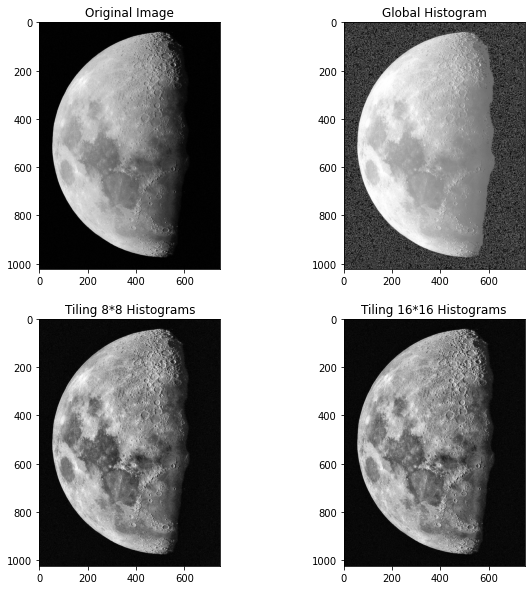

In [1]:
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the given URL
url = "https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/moon.jpg"
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_GRAYSCALE)

# Apply global and local adaptive histogram equalization
eqImg = cv2.equalizeHist(img)
# Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
claheImg1 = clahe.apply(img)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16,16))
claheImg2 = clahe.apply(img)

# Show images
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(eqImg, cmap='gray')
ax[1].set_title("Global Histogram")
ax[2].imshow(claheImg1, cmap='gray')
ax[2].set_title("Tiling 8*8 Histograms")
ax[3].imshow(claheImg2, cmap='gray')
ax[3].set_title("Tiling 16*16 Histograms")

# Save images
cv2.imwrite('CLAHE_Global.png', eqImg)
cv2.imwrite('CLAHE_8by8.png', claheImg1)
cv2.imwrite('CLAHE_16by16.png', claheImg2)

plt.show()
